**Import Required Modules**

In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import itertools
%matplotlib inline

**Input Data**

In [ ]:
movie_data = pd.read_csv('IMDB-Movie-Data.csv')
movie_data.Genre = movie_data.Genre.str.split(',')
movie_data.Actors = movie_data.Actors.str.split(', |,')
# movie_data = movie_data.nlargest(100, 'Revenue (Millions)')
movie_data

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"[Action, Adventure, Sci-Fi]",A group of intergalactic criminals are forced ...,James Gunn,"[Chris Pratt, Vin Diesel, Bradley Cooper, Zoe ...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"[Adventure, Mystery, Sci-Fi]","Following clues to the origin of mankind, a te...",Ridley Scott,"[Noomi Rapace, Logan Marshall-Green, Michael F...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"[Horror, Thriller]",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"[James McAvoy, Anya Taylor-Joy, Haley Lu Richa...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"[Animation, Comedy, Family]","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"[Matthew McConaughey, Reese Witherspoon, Seth ...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"[Action, Adventure, Fantasy]",A secret government agency recruits some of th...,David Ayer,"[Will Smith, Jared Leto, Margot Robbie, Viola ...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"[Crime, Drama, Mystery]","A tight-knit team of rising investigators, alo...",Billy Ray,"[Chiwetel Ejiofor, Nicole Kidman, Julia Robert...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,[Horror],Three American college students studying abroa...,Eli Roth,"[Lauren German, Heather Matarazzo, Bijou Phill...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"[Drama, Music, Romance]",Romantic sparks occur between two dance studen...,Jon M. Chu,"[Robert Hoffman, Briana Evigan, Cassie Ventura...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"[Adventure, Comedy]",A pair of friends embark on a mission to reuni...,Scot Armstrong,"[Adam Pally, T.J. Miller, Thomas Middleditch, ...",2014,93,5.6,4881,NaN,22.0


**Creating a actor's relation network**

{'Derek Jacobi': ['Colin Firth', 'Geoffrey Rush', 'Helena Bonham Carter', 'Colin Firth', 'Geoffrey Rush', 'Helena Bonham Carter'], 'Lili Sepe': ['Maika Monroe', 'Keir Gilchrist', 'Olivia Luccardi', 'Maika Monroe', 'Keir Gilchrist', 'Olivia Luccardi'], 'So-ri Moon': ['Min-hee Kim', 'Jung-woo Ha', 'Jin-woong Jo', 'Min-hee Kim', 'Jung-woo Ha', 'Jin-woong Jo'], 'Sylvester Stallone': ['Michael B. Jordan', 'Michael B. Jordan', 'Tessa Thompson', 'Phylicia Rashad', 'Tessa Thompson', 'Phylicia Rashad', 'Jason Statham', 'Jet Li', 'Antonio Banderas', 'Jason Statham', 'Jet Li', 'Antonio Banderas', 'Jason Statham', 'Jet Li', 'Dolph Lundgren', 'Jason Statham', 'Jet Li', 'Dolph Lundgren', 'Arnold Schwarzenegger', '50 Cent', "Vincent D'Onofrio", 'Arnold Schwarzenegger', '50 Cent', "Vincent D'Onofrio", 'Antonio Tarver', 'Milo Ventimiglia', 'Burt Young', 'Antonio Tarver', 'Milo Ventimiglia', 'Burt Young', 'Julie Benz', 'Matthew Marsden', 'Graham McTavish', 'Julie Benz', 'Matthew Marsden', 'Graham McTavi

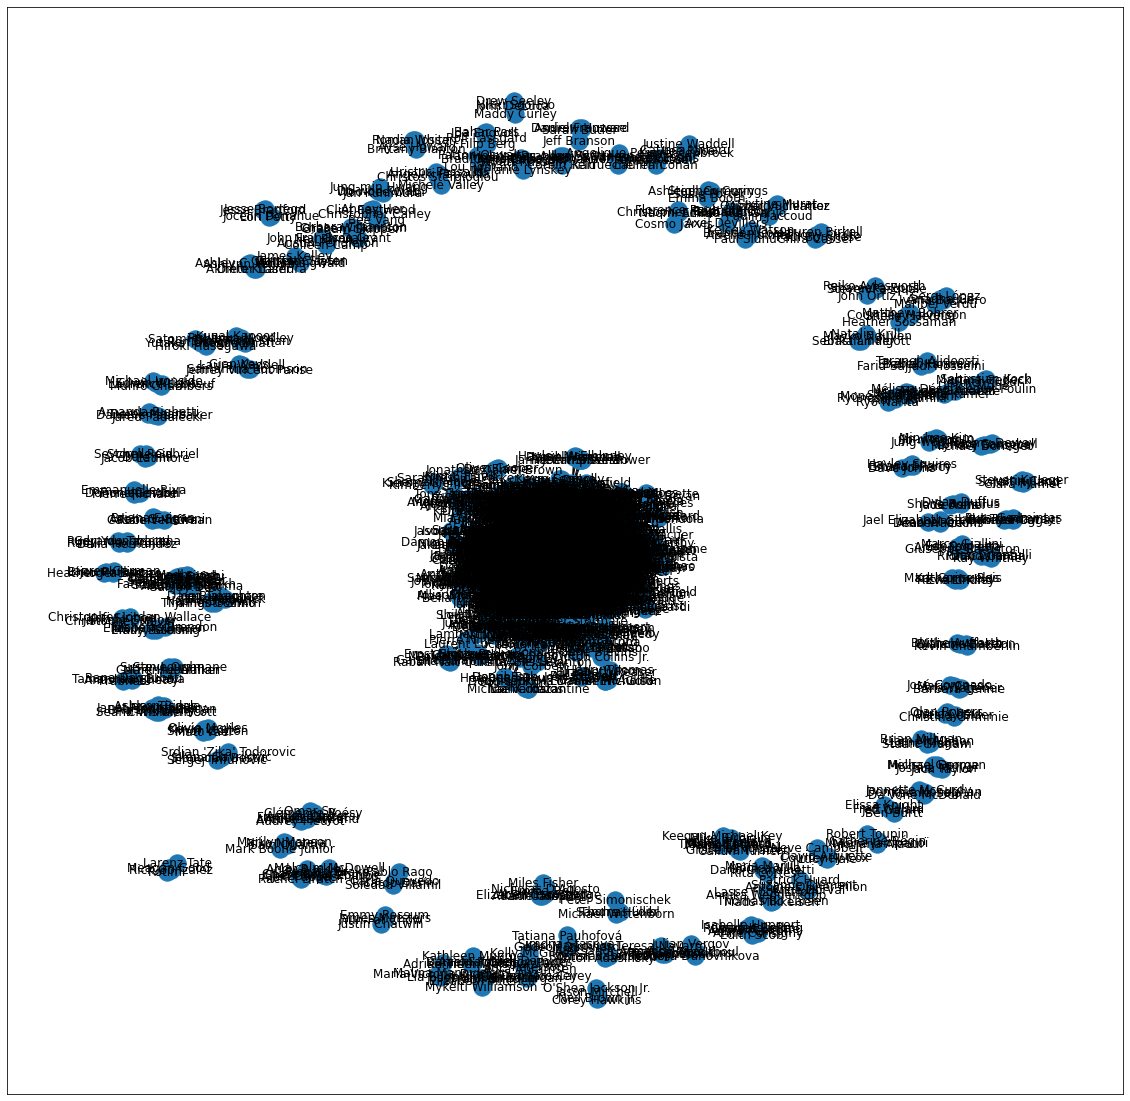

In [ ]:
#creating a set of actors from the data
actors = []
for actor in movie_data.Actors:
  for act in actor :
    actors.append(act)
actors=set(actors)

actor_temp={}
for actor in actors:
  actor_temp[actor]=[]
# print(actor_temp)
actor_temp2={}
for actor in actors:
  actor_temp2[actor]=[]
actors_graph=nx.Graph()
for actor in actors:
  actors_graph.add_node(actor)
i=0
for acts in movie_data.Actors:
  for act in acts:
    actor_temp[act].append(movie_data.Title[i])
    for actt in acts:
      if(act!=actt):
        actors_graph.add_edge(act,actt)
        actor_temp2[act].append(actt)
        actor_temp2[actt].append(act)
        
  i+=1
# print(actor_temp2)
plt.figure(figsize=(20,20))
nx.draw_networkx(actors_graph);




**Creating a genre's relation network**

{'War': ['Inglourious Basterds', '300', 'Mine', "Billy Lynn's Long Halftime Walk", "Pan's Labyrinth", 'Fury', 'Macbeth', 'The Boy in the Striped Pyjamas', 'Frantz', 'Incendies', 'Eye in the Sky', 'Suite Française', 'Rambo'], 'Fantasy': ['Suicide Squad', 'The Great Wall', 'Fantastic Beasts and Where to Find Them', 'Doctor Strange', 'Pirates of the Caribbean: On Stranger Tides', 'Fallen', 'Star Wars: Episode VII - The Force Awakens', 'Underworld: Blood Wars', 'A Monster Calls', "Pirates of the Caribbean: At World's End", "Pirates of the Caribbean: Dead Man's Chest", 'Ghostbusters', 'Avatar', 'Warcraft', 'Kimi no na wa', 'Thor', '300', 'Harry Potter and the Deathly Hallows: Part 2', 'The BFG', 'Scott Pilgrim vs. the World', 'Twilight', 'Cinderella', 'Crimson Peak', 'A Cure for Wellness', 'Thor: The Dark World', 'Gods of Egypt', "Pan's Labyrinth", 'Percy Jackson & the Olympians: The Lightning Thief', 'The Hobbit: An Unexpected Journey', 'Sucker Punch', 'Man of Steel', 'Alice Through the Lo

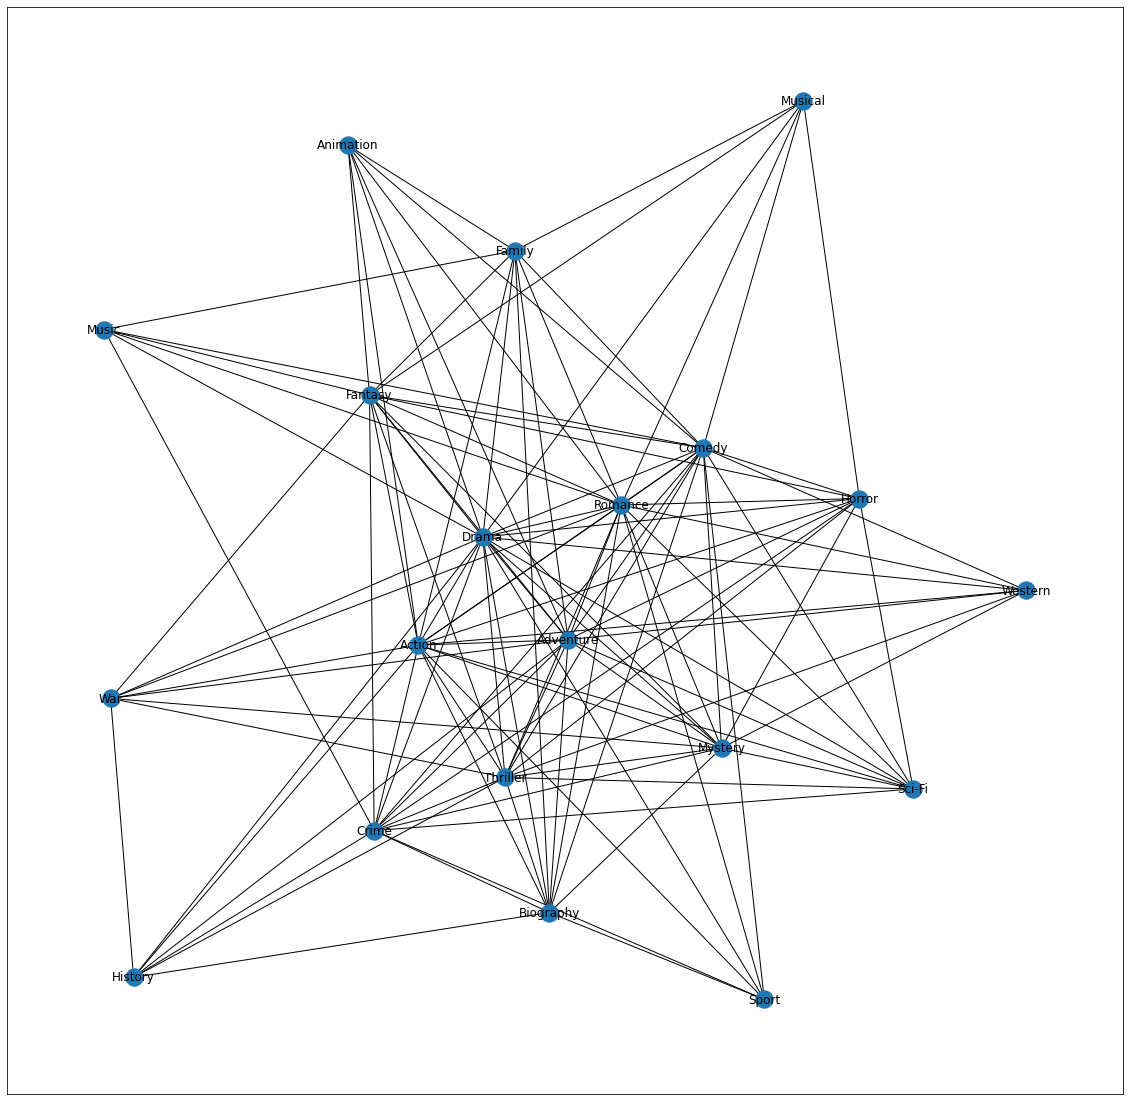

In [ ]:
#creating a set of genres from the data
genres = []
for genre in movie_data.Genre:
  for gen in genre :
    genres.append(gen)
genres=set(genres)
genre_temp={}
for genre in genres:
  genre_temp[genre]=[]
# print(genre_temp)
genres_graph=nx.Graph()
for genre in genres:
  genres_graph.add_node(genre)
i=0
for gens in movie_data.Genre:
  for gen in gens:
    genre_temp[gen].append(movie_data.Title[i])
    for gent in gens:
      if(gen!=gent):
        genres_graph.add_edge(gen,gent)
  i+=1
print(genre_temp)
plt.figure(figsize=(20,20))
nx.draw_networkx(genres_graph);



**Creating a movie's relation network**

In [ ]:
movies = []
for movie in movie_data.Title:
  movies.append(movie)
movie_temp={}
for movie in movies:
  movie_temp[movie]=[]
movies_graph=nx.Graph()
for movie in movies:
  movies_graph.add_node(movie)

plt.figure(figsize=(20,20))
nx.draw_networkx(movies_graph);

In [ ]:
# 1.Actors who have acted with the most other actors?
colaborativeActors = sorted(actors_graph.degree, key=lambda x: x[1], reverse=True)[:10]
for key,value in colaborativeActors:
  print(key," ",value)

Mark Wahlberg   42
Hugh Jackman   41
Christian Bale   37
Brad Pitt   37
Michael Fassbender   33
Jake Gyllenhaal   33
Tom Hardy   33
Anne Hathaway   33
Channing Tatum   33
Scarlett Johansson   32


In [ ]:
#2.The average number of actors one actor has played with(degree of the nodes)?
s=0
for i in (actors_graph.nodes):
  print("degree of node", i ,"->", nx.degree(actors_graph, i))
  s += nx.degree(actors_graph, i)
print("average degree is" , s/len(actors_graph.nodes))


degree of node Derek Jacobi -> 3
degree of node Lili Sepe -> 3
degree of node So-ri Moon -> 3
degree of node Sylvester Stallone -> 19
degree of node Alex Pettyfer -> 9
degree of node Emilie de Ravin -> 6
degree of node Will Smith -> 28
degree of node Leonard Nimoy -> 3
degree of node Andreas Wisniewski -> 3
degree of node Ashley Tisdale -> 3
degree of node Clive Owen -> 9
degree of node Alex Karpovsky -> 3
degree of node Jan Cornet -> 3
degree of node Ice Cube -> 7
degree of node Ellen DeGeneres -> 3
degree of node Keri Russell -> 9
degree of node Aubrey Plaza -> 5
degree of node Cobie Smulders -> 6
degree of node Óscar Jaenada -> 3
degree of node Michael Gambon -> 3
degree of node Freddie Crowder -> 3
degree of node Jeffrey Vincent Parise -> 3
degree of node Ella Rumpf -> 3
degree of node Billy Connolly -> 3
degree of node Sienna Guillory -> 6
degree of node Rachel Blanchard -> 3
degree of node Jonny Brugh -> 3
degree of node Allison Tolman -> 3
degree of node Susie Porter -> 3
degree

In [ ]:
#3 most worked actor in each genre
from collections import Counter
genre_actors={}
for genre in genres:
  genre_actors[genre]=[]
i=0 
for gens in movie_data.Genre:
  for gen in gens:
    for act in movie_data.Actors[i]:
      genre_actors[gen].append(act)
  i+=1
for key in genre_actors:
  temp_dic=Counter(genre_actors[key])
  temp_dic=dict(sorted(temp_dic.items(), key =
             lambda kv:(int(kv[1]), kv[0]),reverse=True))
  print(key,"=>",list(temp_dic.keys())[0])

War => Brad Pitt
Fantasy => Johnny Depp
Biography => Christian Bale
Comedy => Seth Rogen
Family => Zachary Gordon
Musical => Amanda Seyfried
Mystery => Vera Farmiga
Action => Robert Downey Jr.
Western => William Fichtner
Sport => Sylvester Stallone
Adventure => Robert Downey Jr.
Romance => Anna Kendrick
Music => Rebel Wilson
Horror => Patrick Wilson
History => Natalie Portman
Drama => Christian Bale
Crime => Ryan Gosling
Animation => Angelina Jolie
Thriller => Matt Damon
Sci-Fi => Scarlett Johansson


In [ ]:
#4.The density of the all network's?
print("actors_graph ==",nx.density(actors_graph))

print("genres_graph ==",nx.density(genres_graph))

actors_graph == 0.0029221174941090437
genres_graph == 0.6


In [ ]:
#5.clustering coeffiecient of graph
for i in (actors_graph.nodes):
  print("clustering of node" , i , "->", nx.clustering(actors_graph, i))

nx.average_clustering(actors_graph)


clustering of node Derek Jacobi -> 1.0
clustering of node Lili Sepe -> 1.0
clustering of node So-ri Moon -> 1.0
clustering of node Sylvester Stallone -> 0.11695906432748537
clustering of node Alex Pettyfer -> 0.25
clustering of node Emilie de Ravin -> 0.4
clustering of node Will Smith -> 0.08465608465608465
clustering of node Leonard Nimoy -> 1.0
clustering of node Andreas Wisniewski -> 1.0
clustering of node Ashley Tisdale -> 1.0
clustering of node Clive Owen -> 0.2777777777777778
clustering of node Alex Karpovsky -> 1.0
clustering of node Jan Cornet -> 1.0
clustering of node Ice Cube -> 0.38095238095238093
clustering of node Ellen DeGeneres -> 1.0
clustering of node Keri Russell -> 0.25
clustering of node Aubrey Plaza -> 0.6
clustering of node Cobie Smulders -> 0.4666666666666667
clustering of node Óscar Jaenada -> 1.0
clustering of node Michael Gambon -> 1.0
clustering of node Freddie Crowder -> 1.0
clustering of node Jeffrey Vincent Parise -> 1.0
clustering of node Ella Rumpf -> 1.

0.7563543951201918

In [ ]:
degree_values=dict(nx.degree(actors_graph)).values()
unique_deg=list(set(degree_values))
degree_value=list(degree_values)
count_deg=[]
for i in unique_deg:
  x=degree_value.count(i)
  count_deg.append(x)
print(count_deg)


[1, 1300, 11, 19, 244, 6, 17, 115, 10, 12, 61, 3, 14, 36, 8, 18, 22, 7, 5, 15, 6, 7, 7, 3, 5, 9, 7, 1, 3, 1, 3, 5, 2, 1, 1]


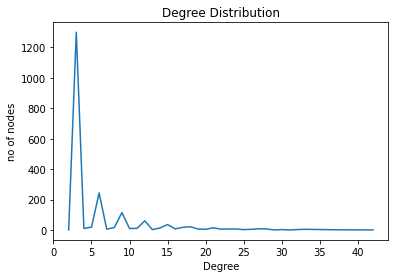

In [ ]:
#6.The degree distribution plot of the actors_graph
plt.plot(unique_deg,count_deg)
plt.xlabel('Degree')
plt.ylabel('no of nodes')
plt.title('Degree Distribution')
plt.show()

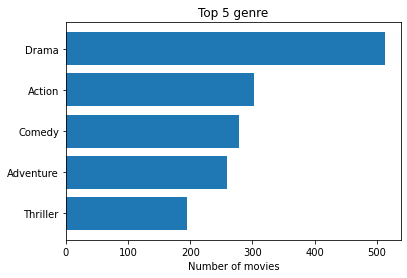

In [ ]:
#7.The most popular film genres  
genre_count = {}
for genre in genres:
    genre_count[genre] = len(genre_temp[genre])
genre_count = sorted(genre_count.items(), key=lambda x: x[1])[-5:]
plt.title('Top 5 genre')
plt.xlabel("Number of movies")
plt.barh([val[0] for val in genre_count], [val[1] for val in genre_count])
plt.show()

In [ ]:
# 8.director has directed the most films?
movie_data.Director.value_counts()[:10]

Ridley Scott          8
David Yates           6
M. Night Shyamalan    6
Paul W.S. Anderson    6
Michael Bay           6
Zack Snyder           5
Denis Villeneuve      5
Woody Allen           5
Peter Berg            5
Danny Boyle           5
Name: Director, dtype: int64

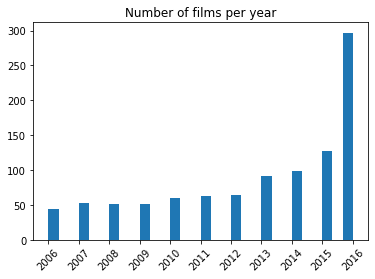

In [ ]:
#9.the film production Every year 
plt.title("Number of films per year")
plt.xticks(range(2006,2017),rotation=45)
plt.hist(movie_data.Year,30)
plt.show()

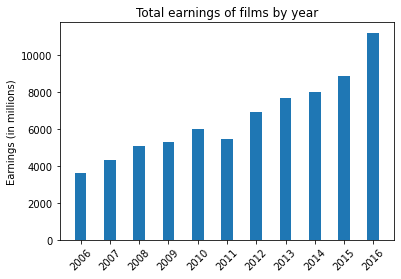

In [ ]:
#10.the total earnings Every year 
plt.title("Total earnings of films by year")
plt.xticks(range(2006,2017),rotation=45)
plt.ylabel("Earnings (in millions)")
plt.bar(range(2006,2017), movie_data.groupby(['Year'])['Revenue (Millions)'].sum(),0.4)
plt.show()

In [ ]:
#11.Top 10 rated movies 
movie_rated={}
i=0
for movie in movie_data.Title:
  movie_rated[movie]=movie_data.Rating[i]
  i+=1
movie_rated=sorted(movie_rated.items(), key=lambda item: item[1],reverse=True)[:10]
for key,val in movie_rated:
  print(key," => ",val)

The Dark Knight  =>  9.0
Inception  =>  8.8
Dangal  =>  8.8
Interstellar  =>  8.6
Kimi no na wa  =>  8.6
The Intouchables  =>  8.6
The Prestige  =>  8.5
The Departed  =>  8.5
The Dark Knight Rises  =>  8.5
Whiplash  =>  8.5


In [ ]:
#12.Top 10 most revenue generated movies
movie_earn={}
i=0
for movie in movie_data.Title:
  if not(math.isnan(movie_data['Revenue (Millions)'][i])) == True:
    movie_earn[movie]=movie_data['Revenue (Millions)'][i]
  i+=1
# print(movie_earn)
movie_earn=sorted(movie_earn.items(), key=lambda item: item[1],reverse=True)[:10]
for key,val in movie_earn:
  print(key," => ",val)

Star Wars: Episode VII - The Force Awakens  =>  936.63
Avatar  =>  760.51
Jurassic World  =>  652.18
The Avengers  =>  623.28
The Dark Knight  =>  533.32
Rogue One  =>  532.17
Finding Dory  =>  486.29
Avengers: Age of Ultron  =>  458.99
The Dark Knight Rises  =>  448.13
The Hunger Games: Catching Fire  =>  424.65


**Centrality Measures**

In [ ]:
deg_centrality=nx.degree_centrality(actors_graph)
print(deg_centrality)

{'Derek Jacobi': 0.0015120967741935483, 'Lili Sepe': 0.0015120967741935483, 'So-ri Moon': 0.0015120967741935483, 'Sylvester Stallone': 0.009576612903225807, 'Alex Pettyfer': 0.004536290322580645, 'Emilie de Ravin': 0.0030241935483870967, 'Will Smith': 0.014112903225806451, 'Leonard Nimoy': 0.0015120967741935483, 'Andreas Wisniewski': 0.0015120967741935483, 'Ashley Tisdale': 0.0015120967741935483, 'Clive Owen': 0.004536290322580645, 'Alex Karpovsky': 0.0015120967741935483, 'Jan Cornet': 0.0015120967741935483, 'Ice Cube': 0.003528225806451613, 'Ellen DeGeneres': 0.0015120967741935483, 'Keri Russell': 0.004536290322580645, 'Aubrey Plaza': 0.0025201612903225806, 'Cobie Smulders': 0.0030241935483870967, 'Óscar Jaenada': 0.0015120967741935483, 'Michael Gambon': 0.0015120967741935483, 'Freddie Crowder': 0.0015120967741935483, 'Jeffrey Vincent Parise': 0.0015120967741935483, 'Ella Rumpf': 0.0015120967741935483, 'Billy Connolly': 0.0015120967741935483, 'Sienna Guillory': 0.0030241935483870967, 

In [ ]:
top_deg=sorted(deg_centrality.items(), key=lambda item: item[1],reverse=True)[:10]
for key,val in top_deg:
  print(key,"=>",val)

Mark Wahlberg => 0.021169354838709676
Hugh Jackman => 0.02066532258064516
Christian Bale => 0.018649193548387098
Brad Pitt => 0.018649193548387098
Michael Fassbender => 0.01663306451612903
Jake Gyllenhaal => 0.01663306451612903
Tom Hardy => 0.01663306451612903
Anne Hathaway => 0.01663306451612903
Channing Tatum => 0.01663306451612903
Scarlett Johansson => 0.016129032258064516


In [ ]:
bet_centrality=nx.betweenness_centrality(actors_graph)
print(bet_centrality)

{'Derek Jacobi': 0.0, 'Lili Sepe': 0.0, 'So-ri Moon': 0.0, 'Sylvester Stallone': 0.007715783744129435, 'Alex Pettyfer': 0.0018115995464106879, 'Emilie de Ravin': 0.00037229305931529383, 'Will Smith': 0.013350466834728705, 'Leonard Nimoy': 0.0, 'Andreas Wisniewski': 0.0, 'Ashley Tisdale': 0.0, 'Clive Owen': 0.0007252113187991701, 'Alex Karpovsky': 0.0, 'Jan Cornet': 0.0, 'Ice Cube': 0.0024629460480975604, 'Ellen DeGeneres': 0.0, 'Keri Russell': 0.001669018570535997, 'Aubrey Plaza': 0.00023219045489767138, 'Cobie Smulders': 0.00022398666160847777, 'Óscar Jaenada': 0.0, 'Michael Gambon': 0.0, 'Freddie Crowder': 0.0, 'Jeffrey Vincent Parise': 0.0, 'Ella Rumpf': 0.0, 'Billy Connolly': 0.0, 'Sienna Guillory': 0.0018822665292601768, 'Rachel Blanchard': 0.0, 'Jonny Brugh': 0.0, 'Allison Tolman': 0.0, 'Susie Porter': 0.0, 'Peter Sarsgaard': 0.0023244452875993554, 'Matthew Perry': 0.0, 'Fran Kranz': 0.0, 'Kelly Macdonald': 0.0, 'Mohamed Akhzam': 0.0, 'Dakota Blue Richards': 0.0, 'Leonardo DiCapr

In [ ]:
top_bet=sorted(bet_centrality.items(), key=lambda item: item[1],reverse=True)[:10]
for key,val in top_bet:
  print(key,"=>",val)

Mark Wahlberg => 0.026482896780064453
Channing Tatum => 0.025788127210341932
Christian Bale => 0.022547365982506805
Hugh Jackman => 0.02076778171482886
Charlize Theron => 0.01755271006081849
Sharlto Copley => 0.01652499561711669
Matthew McConaughey => 0.01651351714724537
Tom Hardy => 0.01575256276205794
Brad Pitt => 0.015329372508813133
Chloë Grace Moretz => 0.015051277694188308


In [ ]:
close_centrality=nx.closeness_centrality(actors_graph)
print(close_centrality)

{'Derek Jacobi': 0.18596095645281388, 'Lili Sepe': 0.14412832670598397, 'So-ri Moon': 0.0015120967741935483, 'Sylvester Stallone': 0.1971467986391925, 'Alex Pettyfer': 0.21164878348824495, 'Emilie de Ravin': 0.16351025567377833, 'Will Smith': 0.24223624104377212, 'Leonard Nimoy': 0.1958174412075655, 'Andreas Wisniewski': 0.19603262520889247, 'Ashley Tisdale': 0.0020161290322580645, 'Clive Owen': 0.21785202766584874, 'Alex Karpovsky': 0.0015120967741935483, 'Jan Cornet': 0.14449523519794552, 'Ice Cube': 0.20518038491302087, 'Ellen DeGeneres': 0.16519748942725823, 'Keri Russell': 0.20969400882966335, 'Aubrey Plaza': 0.2039072211921367, 'Cobie Smulders': 0.18442295415457763, 'Óscar Jaenada': 0.17462282514063002, 'Michael Gambon': 0.1811062831879108, 'Freddie Crowder': 0.19282393801430592, 'Jeffrey Vincent Parise': 0.0015120967741935483, 'Ella Rumpf': 0.12596871003537224, 'Billy Connolly': 0.16007278843489875, 'Sienna Guillory': 0.16927312221507998, 'Rachel Blanchard': 0.17923465230093946,

In [ ]:
top_close=sorted(close_centrality.items(), key=lambda item: item[1],reverse=True)[:10]
for key,val in top_close:
  print(key,"=>",val)

Christian Bale => 0.2648977137421818
Mark Wahlberg => 0.25773536069775954
Brad Pitt => 0.2555726202580117
Charlize Theron => 0.2538064680041962
Hugh Jackman => 0.2532402803854482
Matt Damon => 0.25211544974371997
Anna Kendrick => 0.2518611985842366
Leonardo DiCaprio => 0.2516581665821534
Anne Hathaway => 0.2510005673528935
Josh Brolin => 0.2505975963436976


In [ ]:
eigen_centrality=nx.eigenvector_centrality(actors_graph)
print(eigen_centrality)

{'Derek Jacobi': 0.008417107860197564, 'Lili Sepe': 0.00026980304465551094, 'So-ri Moon': 1.9098732157199367e-12, 'Sylvester Stallone': 0.009811139162665818, 'Alex Pettyfer': 0.018351618707718113, 'Emilie de Ravin': 0.0013643951518778601, 'Will Smith': 0.07231462304598633, 'Leonard Nimoy': 0.011080552910441521, 'Andreas Wisniewski': 0.01110173887561904, 'Ashley Tisdale': 2.4797556190364605e-11, 'Clive Owen': 0.032408849942451835, 'Alex Karpovsky': 1.9098732157199367e-12, 'Jan Cornet': 0.00025667539251071804, 'Ice Cube': 0.01418537548927133, 'Ellen DeGeneres': 0.0016936512974725993, 'Keri Russell': 0.02090220086435072, 'Aubrey Plaza': 0.015831646478314795, 'Cobie Smulders': 0.005998668395848416, 'Óscar Jaenada': 0.0029998705568018633, 'Michael Gambon': 0.004629190603507307, 'Freddie Crowder': 0.0102414812156074, 'Jeffrey Vincent Parise': 1.9098732157199367e-12, 'Ella Rumpf': 3.355041744723675e-05, 'Billy Connolly': 0.0009961556618791243, 'Sienna Guillory': 0.002357689101359183, 'Rachel 

In [ ]:
top_eigen=sorted(bet_centrality.items(), key=lambda item: item[1],reverse=True)[:10]
for key,val in top_eigen:
  print(key,"=>",val)

Mark Wahlberg => 0.026482896780064453
Channing Tatum => 0.025788127210341932
Christian Bale => 0.022547365982506805
Hugh Jackman => 0.02076778171482886
Charlize Theron => 0.01755271006081849
Sharlto Copley => 0.01652499561711669
Matthew McConaughey => 0.01651351714724537
Tom Hardy => 0.01575256276205794
Brad Pitt => 0.015329372508813133
Chloë Grace Moretz => 0.015051277694188308


**Link Prediction**

[('Brad Pitt', 'Channing Tatum', 0.0), ('Brad Pitt', 'Scarlett Johansson', 0.3333333333333333), ('Brad Pitt', 'Jake Gyllenhaal', 0.0), ('Brad Pitt', 'Hugh Jackman', 0.2), ('Brad Pitt', 'Tom Hardy', 0.3333333333333333), ('Brad Pitt', 'Mark Wahlberg', 0.5), ('Brad Pitt', 'Anne Hathaway', 0.2), ('Channing Tatum', 'Michael Fassbender', 0.0), ('Channing Tatum', 'Scarlett Johansson', 0.0), ('Channing Tatum', 'Jake Gyllenhaal', 0.0), ('Channing Tatum', 'Hugh Jackman', 0.0), ('Channing Tatum', 'Tom Hardy', 0.0), ('Channing Tatum', 'Christian Bale', 0.0), ('Channing Tatum', 'Mark Wahlberg', 0.0), ('Channing Tatum', 'Anne Hathaway', 0.0), ('Scarlett Johansson', 'Michael Fassbender', 0.0), ('Scarlett Johansson', 'Jake Gyllenhaal', 0.3333333333333333), ('Scarlett Johansson', 'Tom Hardy', 0.3333333333333333), ('Scarlett Johansson', 'Mark Wahlberg', 0.5), ('Scarlett Johansson', 'Anne Hathaway', 0.5), ('Jake Gyllenhaal', 'Christian Bale', 0.3333333333333333), ('Jake Gyllenhaal', 'Mark Wahlberg', 0.0)

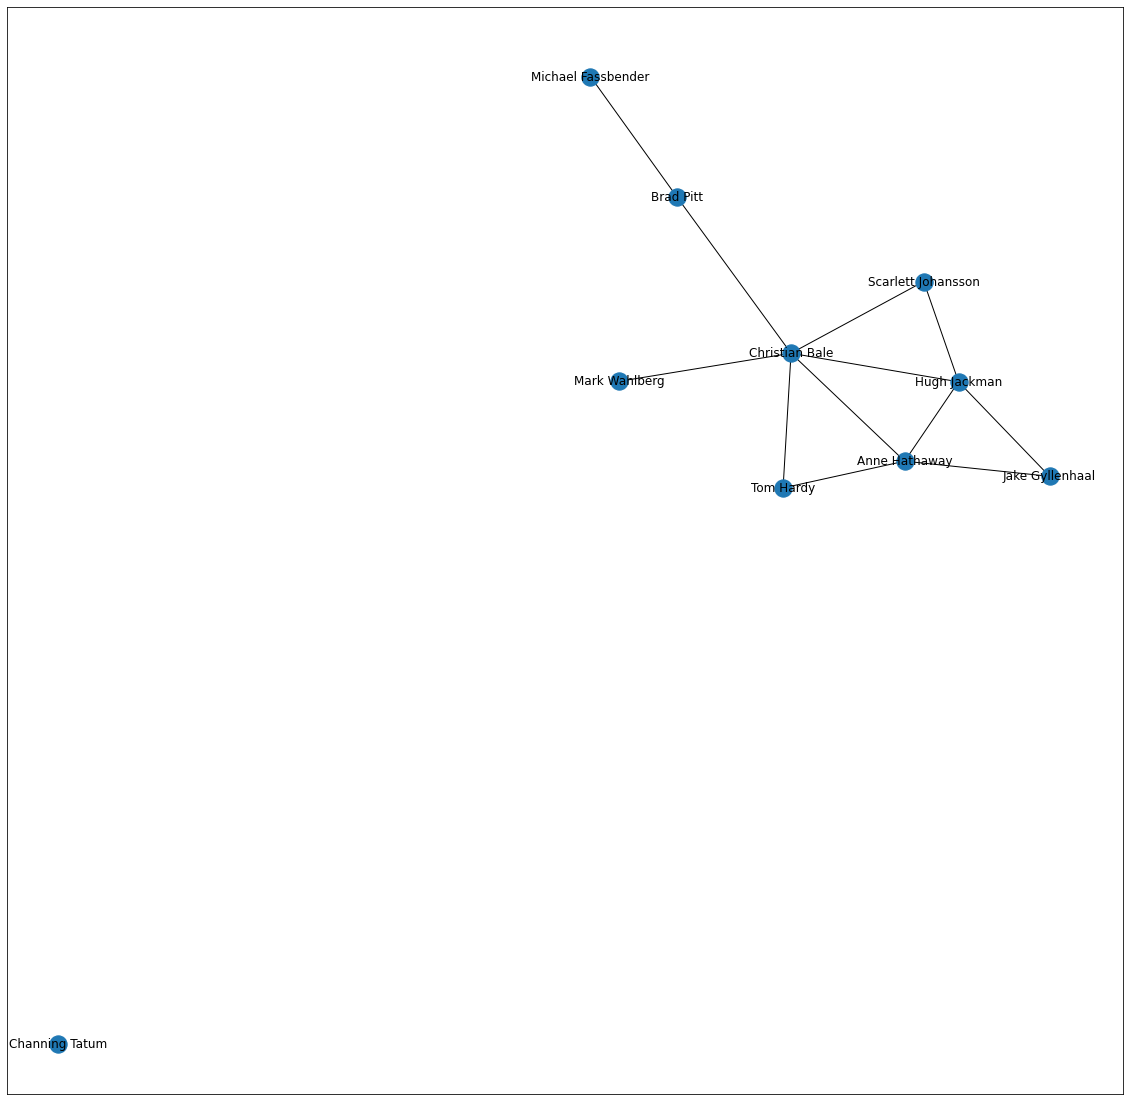

In [ ]:
pactors_graph=nx.Graph()
temp=[]
for actor in colaborativeActors:
  pactors_graph.add_node(actor[0])
  temp.append(actor[0])
# print(actor_temp2)
for act in temp:
  for ele in actor_temp2[act]:
    if ele in temp and ele!=act:
      pactors_graph.add_edge(ele,act)

plt.figure(figsize=(20,20))
nx.draw_networkx(pactors_graph);

In [ ]:
temp_list=list(nx.jaccard_coefficient(pactors_graph))
temp_list.sort(key = lambda x: x[-1])
temp_list=(temp_list)[::-1]
for ele in temp_list:
  print(str(ele[0])+",",str(ele[1])+",",str(ele[-1]))

Tom Hardy, Mark Wahlberg, 0.5
Hugh Jackman, Tom Hardy, 0.5
Scarlett Johansson, Anne Hathaway, 0.5
Scarlett Johansson, Mark Wahlberg, 0.5
Brad Pitt, Mark Wahlberg, 0.5
Jake Gyllenhaal, Tom Hardy, 0.3333333333333333
Jake Gyllenhaal, Christian Bale, 0.3333333333333333
Scarlett Johansson, Tom Hardy, 0.3333333333333333
Scarlett Johansson, Jake Gyllenhaal, 0.3333333333333333
Brad Pitt, Tom Hardy, 0.3333333333333333
Brad Pitt, Scarlett Johansson, 0.3333333333333333
Mark Wahlberg, Anne Hathaway, 0.25
Hugh Jackman, Mark Wahlberg, 0.25
Brad Pitt, Anne Hathaway, 0.2
Brad Pitt, Hugh Jackman, 0.2
Christian Bale, Michael Fassbender, 0.16666666666666666
Anne Hathaway, Michael Fassbender, 0.0
Mark Wahlberg, Michael Fassbender, 0.0
Tom Hardy, Michael Fassbender, 0.0
Hugh Jackman, Michael Fassbender, 0.0
Jake Gyllenhaal, Michael Fassbender, 0.0
Jake Gyllenhaal, Mark Wahlberg, 0.0
Scarlett Johansson, Michael Fassbender, 0.0
Channing Tatum, Anne Hathaway, 0.0
Channing Tatum, Mark Wahlberg, 0.0
Channing Ta

In [ ]:
temp_list=list(nx.resource_allocation_index(pactors_graph))
temp_list.sort(key = lambda x: x[-1])
temp_list=(temp_list)[::-1]
for ele in temp_list:
  print(str(ele[0])+",",str(ele[1])+",",str(ele[-1]))
# print(temp_list)

[('Brad Pitt', 'Channing Tatum', 0), ('Brad Pitt', 'Jake Gyllenhaal', 0), ('Channing Tatum', 'Michael Fassbender', 0), ('Channing Tatum', 'Scarlett Johansson', 0), ('Channing Tatum', 'Jake Gyllenhaal', 0), ('Channing Tatum', 'Hugh Jackman', 0), ('Channing Tatum', 'Tom Hardy', 0), ('Channing Tatum', 'Christian Bale', 0), ('Channing Tatum', 'Mark Wahlberg', 0), ('Channing Tatum', 'Anne Hathaway', 0), ('Scarlett Johansson', 'Michael Fassbender', 0), ('Jake Gyllenhaal', 'Mark Wahlberg', 0), ('Jake Gyllenhaal', 'Michael Fassbender', 0), ('Hugh Jackman', 'Michael Fassbender', 0), ('Tom Hardy', 'Michael Fassbender', 0), ('Mark Wahlberg', 'Michael Fassbender', 0), ('Anne Hathaway', 'Michael Fassbender', 0), ('Brad Pitt', 'Scarlett Johansson', 0.16666666666666666), ('Brad Pitt', 'Hugh Jackman', 0.16666666666666666), ('Brad Pitt', 'Tom Hardy', 0.16666666666666666), ('Brad Pitt', 'Mark Wahlberg', 0.16666666666666666), ('Brad Pitt', 'Anne Hathaway', 0.16666666666666666), ('Scarlett Johansson', 'To

In [ ]:
temp_list=list(nx.adamic_adar_index(pactors_graph))
temp_list.sort(key = lambda x: x[-1])
temp_list=(temp_list)[::-1]
for ele in temp_list:
  print(str(ele[0])+",",str(ele[1])+",",str(ele[-1]))

Christian Bale, Michael Fassbender, 1.4426950408889634
Jake Gyllenhaal, Christian Bale, 1.4426950408889634
Hugh Jackman, Tom Hardy, 1.279458146995729
Scarlett Johansson, Anne Hathaway, 1.279458146995729
Jake Gyllenhaal, Tom Hardy, 0.7213475204444817
Scarlett Johansson, Jake Gyllenhaal, 0.7213475204444817
Mark Wahlberg, Anne Hathaway, 0.5581106265512472
Tom Hardy, Mark Wahlberg, 0.5581106265512472
Hugh Jackman, Mark Wahlberg, 0.5581106265512472
Scarlett Johansson, Mark Wahlberg, 0.5581106265512472
Scarlett Johansson, Tom Hardy, 0.5581106265512472
Brad Pitt, Anne Hathaway, 0.5581106265512472
Brad Pitt, Mark Wahlberg, 0.5581106265512472
Brad Pitt, Tom Hardy, 0.5581106265512472
Brad Pitt, Hugh Jackman, 0.5581106265512472
Brad Pitt, Scarlett Johansson, 0.5581106265512472
Anne Hathaway, Michael Fassbender, 0
Mark Wahlberg, Michael Fassbender, 0
Tom Hardy, Michael Fassbender, 0
Hugh Jackman, Michael Fassbender, 0
Jake Gyllenhaal, Michael Fassbender, 0
Jake Gyllenhaal, Mark Wahlberg, 0
Scarlet

In [ ]:
temp_list=list(nx.preferential_attachment(pactors_graph))
temp_list.sort(key = lambda x: x[-1])
temp_list=(temp_list)[::-1]
for ele in temp_list:
  print(str(ele[0])+",",str(ele[1])+",",str(ele[-1]))

Jake Gyllenhaal, Christian Bale, 12
Hugh Jackman, Tom Hardy, 8
Scarlett Johansson, Anne Hathaway, 8
Brad Pitt, Anne Hathaway, 8
Brad Pitt, Hugh Jackman, 8
Christian Bale, Michael Fassbender, 6
Anne Hathaway, Michael Fassbender, 4
Mark Wahlberg, Anne Hathaway, 4
Hugh Jackman, Michael Fassbender, 4
Hugh Jackman, Mark Wahlberg, 4
Jake Gyllenhaal, Tom Hardy, 4
Scarlett Johansson, Tom Hardy, 4
Scarlett Johansson, Jake Gyllenhaal, 4
Brad Pitt, Tom Hardy, 4
Brad Pitt, Jake Gyllenhaal, 4
Brad Pitt, Scarlett Johansson, 4
Tom Hardy, Michael Fassbender, 2
Tom Hardy, Mark Wahlberg, 2
Jake Gyllenhaal, Michael Fassbender, 2
Jake Gyllenhaal, Mark Wahlberg, 2
Scarlett Johansson, Mark Wahlberg, 2
Scarlett Johansson, Michael Fassbender, 2
Brad Pitt, Mark Wahlberg, 2
Mark Wahlberg, Michael Fassbender, 1
Channing Tatum, Anne Hathaway, 0
Channing Tatum, Mark Wahlberg, 0
Channing Tatum, Christian Bale, 0
Channing Tatum, Tom Hardy, 0
Channing Tatum, Hugh Jackman, 0
Channing Tatum, Jake Gyllenhaal, 0
Channing